<a href="https://colab.research.google.com/github/rwamux/notebooks/blob/main/Copy_of_translator_lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 2.8 MB/s 
     |████████████████████████████████| 462 kB 29.6 MB/s 


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow.keras.layers.experimental import preprocessing
import typing
from typing import Any,Tuple
from google.colab import files
import io
import matplotlib

In [ ]:
use_builtins = True

In [ ]:
uploaded = files.upload()

Saving Luganda.csv to Luganda.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Luganda.csv']))

In [ ]:
df.head()

,English,Luganda,Unnamed: 2,Unnamed: 3
0,All refugees were requested to register with t...,Abanoonyiboobubudamu bonna baasabiddwa beewand...,NaN,NaN
1,They called for a refugees' meeting yesterday.,Baayise olukungaana lw'abanoonyiboobubudamu eg...,NaN,NaN
2,Refugees had misunderstandings between thems...,Abanoonyiboobubudamu b'abadde n'obutakkaanya w...,NaN,NaN
3,We were urged to welcome refugees into our com...,Twakubirizibwa okwaniriza abanoonyiboobubudamu...,NaN,NaN
4,More development is achieved when we work toge...,Bwe tukolera awamu enkulaakulana enyingi efuni...,NaN,NaN


In [ ]:
df = df[['English','Luganda']]

In [ ]:
df.head()

,English,Luganda
0,All refugees were requested to register with t...,Abanoonyiboobubudamu bonna baasabiddwa beewand...
1,They called for a refugees' meeting yesterday.,Baayise olukungaana lw'abanoonyiboobubudamu eg...
2,Refugees had misunderstandings between thems...,Abanoonyiboobubudamu b'abadde n'obutakkaanya w...
3,We were urged to welcome refugees into our com...,Twakubirizibwa okwaniriza abanoonyiboobubudamu...
4,More development is achieved when we work toge...,Bwe tukolera awamu enkulaakulana enyingi efuni...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  15022 non-null  object
 1   Luganda  15021 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 0 to 15021
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  15021 non-null  object
 1   Luganda  15021 non-null  object
dtypes: object(2)
memory usage: 352.1+ KB


In [ ]:
df.shape[0],len(df.English)

(15021, 15021)

In [ ]:
BUFFER_SIZE = df.shape[0]
BATCH_SIZE = 64

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((df.English,df.Luganda)).shuffle(BUFFER_SIZE, seed = 42)

In [ ]:
dataset = dataset.batch(BATCH_SIZE)

In [ ]:
for example_input_batch,example_target_batch in dataset.take(1):
  print(example_input_batch[:5])
  print("/n")
  print(example_target_batch[:5])

tf.Tensor(
[b'The activity was to remember the missionaries who introduced Christianity in Uganda.'
 b'Constructing a building takes a while.'
 b'There is increased security in the refugee camps.'
 b'How much do you know about hepatitis?'
 b'More health camps should be organized to extend services to remote areas.'], shape=(5,), dtype=string)
/n
tf.Tensor(
[b'Ebikolwa byakoleddwa okujjukira abaminsane abaleeta obukrisitu mu Uganda'
 b'Okuzimba ekizimbe kitwala obudde.'
 b"Obukuumi bweyongedde mu nkambi z'Abanoonyiboobubudamu."
 b"Omanyi kyenkanawa ku bulwadde bw'ekibumba?"
 b"Ensiisira z'ebyobulamu ziteekeddwa okutegekebwa okutuusa obuweereza mu byalo."], shape=(5,), dtype=string)


In [ ]:
test_ds = dataset.take(1)
train_ds = dataset.skip(1)

In [ ]:
def text_preprocess(text):
  text = tf.strings.lower(text)
  text = tf.strings.regex_replace(text,'[^ a-z.?,\']','')
  text = tf.strings.regex_replace(text,'[.?,\']',r' \0 ')
  text = tf.strings.strip(text)
  text = tf.strings.join(['[START]',text,'[ENDS]'],separator= ' ')
  return text



In [ ]:
example_text = tf.constant('Early childhood centers offer day care services for babies')

In [ ]:
tf.strings.split(example_text).numpy()

array([b'Early', b'childhood', b'centers', b'offer', b'day', b'care',
       b'services', b'for', b'babies'], dtype=object)

In [ ]:
print('Before Preprocessing: '+ example_text.numpy().decode())
print('After Preprocessing: ' + text_preprocess(example_text).numpy().decode())

Before Preprocessing: Early childhood centers offer day care services for babies
After Preprocessing: [START] early childhood centers offer day care services for babies [ENDS]


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
text_corpus = ['Early childhood centers offer day care services for babies','Good early childhood centers are very expensive to some parents']

In [ ]:
tokenizer.fit_on_texts(text_corpus)

In [ ]:
max_vocab_size = 15000

In [ ]:
input_text_processor = preprocessing.TextVectorization(standardize=text_preprocess,max_tokens=max_vocab_size)

In [ ]:
input_text_processor.adapt(df.English)

In [ ]:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[ENDS]', '.', 'the', 'to', 'in', 'of', 'a']

In [ ]:
output_text_processor = preprocessing.TextVectorization(standardize=text_preprocess,max_tokens=max_vocab_size)

In [ ]:
output_text_processor.adapt(df.Luganda)

In [ ]:
output_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[ENDS]', '.', "'", 'mu', 'ku', 'abantu', 'n']

In [ ]:
example_tokens = input_text_processor(example_input_batch)

In [ ]:
example_input_batch[10].numpy()

b'Patients that have recovered are discharged from the hospital.'

In [ ]:
example_tokens[10].numpy()

array([   2,  184,   42,   17, 1379,   10, 1427,   24,    5,  107,    4,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [ ]:
embed_dim = 300
units = 1024

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self,input_vocab_size,embed_dim,enc_units):
    super(Encoder,self).__init__()

    self.vocab_size = input_vocab_size
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,embed_dim)
    self.gru = tf.keras.layers.LSTM(enc_units, return_sequences=True, return_state=True)

  def call(self,tokens,state=None):
    vectors = self.embedding(tokens)
    output, state_h, state_c = self.gru(vectors,state)
    state = [state_h,state_c]

    return output,state



In [ ]:
encoder = Encoder(input_text_processor.vocabulary_size(),embed_dim,units)

In [ ]:
example_enc_output,example_enc_state = encoder(example_tokens)

In [ ]:
example_enc_output.shape

TensorShape([64, 26, 1024])

In [ ]:
example_enc_state

[<tf.Tensor: shape=(64, 1024), dtype=float32, numpy=
 array([[ 0.00419069,  0.00784983, -0.00329083, ..., -0.0029636 ,
          0.00575009, -0.00486247],
        [ 0.00396747,  0.00950198, -0.00497685, ..., -0.00264027,
          0.00748817, -0.00602653],
        [ 0.00399008,  0.00907801, -0.00475239, ..., -0.00300182,
          0.00704372, -0.00567601],
        ...,
        [ 0.0027853 ,  0.00555447, -0.00076775, ..., -0.0022939 ,
          0.00378035, -0.00422401],
        [ 0.00367785,  0.0087494 , -0.00414119, ..., -0.00290837,
          0.00677881, -0.00580551],
        [ 0.00404331,  0.00874286, -0.00436475, ..., -0.00287812,
          0.00662063, -0.00574746]], dtype=float32)>,
 <tf.Tensor: shape=(64, 1024), dtype=float32, numpy=
 array([[ 0.00845583,  0.01572464, -0.00658719, ..., -0.00591872,
          0.01159497, -0.00972656],
        [ 0.00800358,  0.01904413, -0.00996308, ..., -0.00527275,
          0.01510938, -0.01205408],
        [ 0.00805052,  0.01819271, -0.00951248,

In [ ]:
class BahdAttention(tf.keras.layers.Layer):
  def __init__(self,units):
    super().__init__()
    self.w = tf.keras.layers.Dense(units)
    self.u = tf.keras.layers.Dense(units)
    self.attention = tf.keras.layers.AdditiveAttention()

  def call(self,query,value,mask):
    w_query = self.w(query)
    u_key = self.u(value)

    query_mask = tf.ones(tf.shape(query)[:-1],dtype = bool)
    value_mask = mask

    context_vector,attention_weights = self.attention(inputs=[w_query,value,u_key],mask=[query_mask,value_mask],return_attention_scores = True)

    return context_vector,attention_weights


In [ ]:
attention = BahdAttention(units)

In [ ]:
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

In [ ]:
context_v, attention_w = attention(query=example_attention_query,value = example_enc_output,mask=(example_tokens!=0))

In [ ]:
context_v.shape, attention_w.shape

(TensorShape([64, 2, 1024]), TensorShape([64, 2, 26]))

In [ ]:
class DecoderInput(typing.NamedTuple):
  new_tokens: Any
  enc_output : Any
  mask : Any

In [ ]:
class DecoderOutput(typing.NamedTuple):
  logits : Any
  attention_weights : Any


In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self,output_vocab_size,embed_dim,dec_units):
    super(Decoder,self).__init__()
    self.vocab_size = output_vocab_size
    self.dec_units = dec_units

    self.embedding = tf.keras.layers.Embedding(self.vocab_size,embed_dim)
    self.gru = tf.keras.layers.LSTM(self.dec_units,return_sequences=True,return_state=True)
    self.attention = BahdAttention(self.dec_units)
    self.Wc = tf.keras.layers.Dense(self.dec_units,activation = tf.math.tanh,use_bias=False)
    self.fc = tf.keras.layers.Dense(self.vocab_size)

  def call(self,inputs:DecoderInput,state=None) -> Tuple[DecoderOutput, tf.Tensor] :
    vectors = self.embedding(inputs.new_tokens)
    output, state_h, state_c = self.gru(vectors, initial_state=state)
    state = [state_h,state_c]
    context_vector, attention_weights = self.attention(query=output,value=inputs.enc_output,mask=inputs.mask)
    context_output = tf.concat([context_vector,output],axis=-1)
    attention_vector = self.Wc(context_output)
    logits = self.fc(attention_vector)

    return DecoderOutput(logits,attention_weights), state




In [ ]:
decoder = Decoder(output_text_processor.vocabulary_size(),embed_dim,units)

In [ ]:
example_output_tokens = output_text_processor(example_target_batch)

In [ ]:
start_index = output_text_processor.get_vocabulary().index('[START]')

In [ ]:
first_token = tf.constant([[start_index]] * example_output_tokens.shape[0])

In [ ]:
first_token.shape

TensorShape([64, 1])

In [ ]:
dec_result,dec_state = decoder(inputs= DecoderInput(new_tokens=first_token,enc_output=example_enc_output,mask=(example_tokens!=0)),state=example_enc_state)

In [ ]:
dec_result.logits.shape

TensorShape([64, 1, 15000])

In [ ]:
dec_state[0].shape, dec_state[1].shape

(TensorShape([64, 1024]), TensorShape([64, 1024]))

In [ ]:
input_text_processor.vocabulary_size(),output_text_processor.vocabulary_size()

(7881, 15000)

In [ ]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)

In [ ]:
vocab = np.array(output_text_processor.get_vocabulary())
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['terinnafuuka'],
       ['byenyigidde'],
       ['zikyaliwo'],
       ['bwonoona'],
       ['ebitaliimu']], dtype='<U23')

In [ ]:
dec_result, dec_state = decoder(
    DecoderInput(sampled_token,
                 example_enc_output,
                 mask=(example_tokens != 0)),
    state=dec_state)

In [ ]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['okusembeza'],
       ['ebyama'],
       ['ebyanunulwa'],
       ['liweereza'],
       ['okukwasibwa']], dtype='<U23')

In [ ]:
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,reduction='none')

  def __call__(self,y_true,y_pred):
    loss = self.loss(y_true,y_pred)
    mask = tf.cast(y_true !=0 ,tf.float32)
    loss *=mask

    return tf.reduce_sum(loss)

In [ ]:
class TrainTranslator(tf.keras.Model):
  def __init__(self,embed_dim,units, input_text_processor, output_text_processor,use_tf_function=True):
    super().__init__()

    encoder = Encoder(input_text_processor.vocabulary_size(),embed_dim,units)
    decoder = Decoder(output_text_processor.vocabulary_size(),embed_dim,units)

    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor
    self.use_tf_function = use_tf_function

  def train_step(self,inputs):
      if self.use_tf_function:
        return self._tf_train_step(inputs)
      else:
        return self._train_step(inputs)

  def _preprocess(self,input_text,target_text):
      input_tokens = input_text_processor(input_text)
      target_tokens = output_text_processor(target_text)
      input_mask = input_tokens!=0
      target_mask = target_tokens!=0

      return input_tokens,target_tokens,input_mask,target_mask

  def _train_step(self,inputs):
    input_text,target_text = inputs

    input_tokens,target_tokens,input_mask,target_mask = self._preprocess(input_text,target_text)
    max_target_length = tf.shape(target_tokens)[1]

    with tf.GradientTape() as tape:
      enc_output, enc_state = self.encoder(input_tokens)
      dec_state = enc_state

      loss = tf.constant(0.0)

      for t in tf.range(max_target_length-1):

    #    new_tokens = target_tokens[:,x:x+2]
     #   dec_input_tokens = new_tokens[:,0:1]
     #   dec_target_tokens = target_tokens[:,1:2]

      #  dec_input = DecoderInput(dec_input_tokens,enc_output,input_mask)

        new_tokens = target_tokens[:, t:t+2]
        step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                             enc_output, dec_state)
        loss = loss + step_loss

        #dec_result,dec_state = decoder(dec_input,dec_state)

        #y_pred = dec_result.logits
        #y = dec_target_tokens
        #step_loss = self.loss(y,y_pred)
        #loss = loss + step_loss

      average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

    variables = self.trainable_variables
    gradients = tape.gradient(average_loss,variables)
    self.optimizer.apply_gradients(zip(gradients,variables))

    return {'batch_loss' : average_loss}

  def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
    input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]

  # Run the decoder one step.
    decoder_input = DecoderInput(new_tokens=input_token,
                               enc_output=enc_output,
                               mask=input_mask)

    dec_result, dec_state = self.decoder(decoder_input, state=dec_state)

  # `self.loss` returns the total for non-padded tokens
    y = target_token
    y_pred = dec_result.logits
    step_loss = self.loss(y, y_pred)

    return step_loss, dec_state

  @tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
  def _tf_train_step(self,inputs):
    return self._train_step(inputs)






In [ ]:
translator = TrainTranslator(embed_dim,units, input_text_processor=input_text_processor, output_text_processor = output_text_processor,use_tf_function=True)

In [ ]:
translator.compile(optimizer = tf.optimizers.Adam(), loss = MaskedLoss())

In [ ]:
np.log(output_text_processor.vocabulary_size())

9.615805480084347

In [ ]:
%%time
for n in range(10):
  print(translator.train_step([example_input_batch, example_target_batch]))
print()

{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=8.761132>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=8.747851>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=8.687088>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=8.0126>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=6.1959314>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=5.201683>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.8024735>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.659678>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.5900745>}
{'batch_loss': <tf.Tensor: shape=(), dtype=float32, numpy=4.533132>}

CPU times: user 18 s, sys: 1.14 s, total: 19.2 s
Wall time: 16.9 s


....................................................................................................


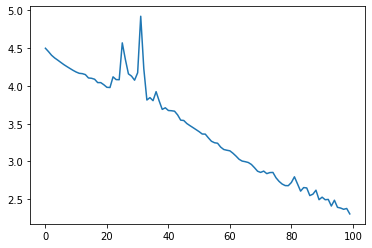

In [ ]:
losses = []
for n in range(100):
  print('.', end='')
  logs = translator.train_step([example_input_batch, example_target_batch])
  losses.append(logs['batch_loss'].numpy())

print()
plt.plot(losses)

In [ ]:
train_translator = TrainTranslator(
    embed_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor)

# Configure the loss and optimizer
train_translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [ ]:
class BatchLogs(tf.keras.callbacks.Callback):
  def __init__(self,key):
    self.key = key
    self.logs = []

  def on_train_batch_end(self,n,logs):
    self.logs.append(logs[self.key])


In [ ]:
batch_loss = BatchLogs('batch_loss')

In [ ]:
train_translator.fit(train_ds, epochs=20,callbacks=[batch_loss])

Epoch 1/20
234/234 [==============================] - 170s 686ms/step - batch_loss: 5.6155
Epoch 2/20
234/234 [==============================] - 160s 684ms/step - batch_loss: 4.7818
Epoch 3/20
234/234 [==============================] - 160s 683ms/step - batch_loss: 4.6599
Epoch 4/20
234/234 [==============================] - 162s 691ms/step - batch_loss: 4.0126
Epoch 5/20
234/234 [==============================] - 161s 686ms/step - batch_loss: 3.5934
Epoch 6/20
234/234 [==============================] - 160s 684ms/step - batch_loss: 3.1322
Epoch 7/20
234/234 [==============================] - 159s 681ms/step - batch_loss: 2.5771
Epoch 8/20
234/234 [==============================] - 159s 680ms/step - batch_loss: 2.0014
Epoch 9/20
234/234 [==============================] - 158s 675ms/step - batch_loss: 1.4927
Epoch 10/20
234/234 [==============================] - 159s 678ms/step - batch_loss: 1.0913
Epoch 11/20
234/234 [==============================] - 160s 685ms/step - batch_loss: 0.78

In [ ]:
batch_loss.logs

[8.798468589782715,
 8.733905792236328,
 8.707443237304688,
 8.459784507751465,
 7.273426532745361,
 6.487459182739258,
 6.207139492034912,
 6.210538387298584,
 6.184382438659668,
 6.303684711456299,
 6.156476974487305,
 6.393448352813721,
 6.273400783538818,
 6.149407386779785,
 6.042700290679932,
 6.289069652557373,
 6.375199317932129,
 6.082449436187744,
 6.288249492645264,
 6.1979146003723145,
 6.204837322235107,
 6.114953517913818,
 5.912710189819336,
 6.06814432144165,
 6.266837120056152,
 6.111166000366211,
 6.286511421203613,
 6.173669815063477,
 5.970661163330078,
 6.179229259490967,
 6.066042423248291,
 6.180558681488037,
 5.854885578155518,
 6.199954032897949,
 5.995820999145508,
 6.052000522613525,
 6.032338619232178,
 5.86350154876709,
 6.070072174072266,
 5.908779621124268,
 5.867590427398682,
 5.8536176681518555,
 6.034265518188477,
 5.783714771270752,
 5.840068817138672,
 5.835540771484375,
 5.817277431488037,
 5.821218490600586,
 5.862257957458496,
 5.725565433502197,


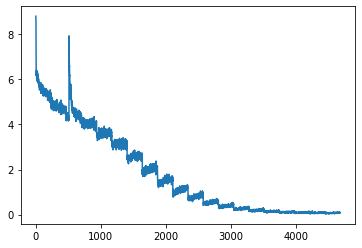

In [ ]:
plt.plot(batch_loss.logs)

Text(0, 0.5, 'CE/token')

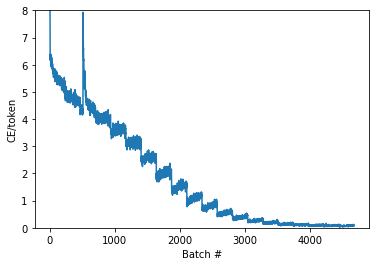

In [ ]:
plt.plot(batch_loss.logs)
plt.ylim([0, 8])
plt.xlabel('Batch #')
plt.ylabel('CE/token')

In [ ]:
tf.constant('[START]').numpy()

b'[START]'

In [ ]:
loog = tf.squeeze(dec_result.logits, axis=1)
new_t = tf.random.categorical(loog/1.0,num_samples=1)

In [ ]:
class Translator(tf.Module):
  def __init__(self,encoder,decoder,input_text_processor,output_text_processor):
    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor

    self.output_token_string_fromidx = (tf.keras.layers.StringLookup(vocabulary = output_text_processor.get_vocabulary(),mask_token = '',invert = True ))

    idx_from_string = tf.keras.layers.StringLookup(vocabulary = output_text_processor.get_vocabulary(), mask_token = '')
    token_mask_ids = idx_from_string(['','[UNK]','[START]']).numpy()

    token_mask = np.zeros([idx_from_string.vocabulary_size()],dtype=np.bool)
    token_mask[np.array(token_mask_ids)] = True

    self.token_mask= token_mask
    self.start_token = idx_from_string(tf.constant('[START]'))
    self.end_token = idx_from_string(tf.constant('[ENDS]'))

  def tokens_to_text(self,result_tokens):
    result_text_tokens = self.output_token_string_fromidx(result_tokens)
    result_text = tf.strings.reduce_join(result_text_tokens,axis=1,separator=' ')
    result_text = tf.strings.strip(result_text)
    return result_text

  def sample(self,logits,temperature):
    token_mask = self.token_mask[tf.newaxis,tf.newaxis,:]

    logits = tf.where(token_mask, -np.inf, logits)

    if (temperature == 0.0):
      new_tokens = tf.argmax(logits, axis=-1)
    else:
      logits = tf.squeeze(logits, axis=1)
      new_tokens = tf.random.categorical(logits/temperature,num_samples=1)

    return new_tokens

  def translate(self, input_text, *, max_length=50,return_attention = True,temperature =1.0):
    batch_size = tf.shape(input_text)[0]
    input_tokens = self.input_text_processor(input_text)
    enc_output, enc_state = self.encoder(input_tokens)

    dec_state = enc_state
    new_tokens = tf.fill([batch_size,1], self.start_token)

    result_tokens = []
    attention = []
    done = tf.zeros([batch_size,1], dtype = tf.bool)

    for _ in tf.range(max_length):
      dec_input = DecoderInput(new_tokens=new_tokens,enc_output= enc_output,mask = (input_tokens !=0))

      dec_result, dec_state = self.decoder(dec_input,dec_state)

      attention.append(dec_result.attention_weights)
      new_tokens = self.sample(dec_result.logits, temperature)

      done  = done | (new_tokens == self.end_token)
      new_tokens = tf.where(done, tf.constant(0,dtype=tf.int64), new_tokens)

      result_tokens.append(new_tokens)

      if tf.executing_eagerly() and tf.reduce_all(done):
        break

    result_tokens = tf.concat(result_tokens,axis=-1)
    result_text = self.tokens_to_text(result_tokens)

    if return_attention:
      attention_stack = tf.concat(attention, axis=1)
      return {'text': result_text, 'attention': attention_stack}
    else:
      return {'text': result_text}








In [ ]:
translator = Translator(train_translator.encoder,train_translator.decoder,input_text_processor,output_text_processor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [ ]:
for i,v in test_ds.take(1):
  input_text = i
  output_text = v[:5]

In [ ]:
len(input_text)

64

In [ ]:
input_text

<tf.Tensor: shape=(64,), dtype=string, numpy=
array([b'He is a cattle keeper.',
       b'The opposition party leader was also arrested.',
       b'People are advised to engage in development     al activities.',
       b'The police need information from bus managers to arrest the thieves.',
       b'Universities offer a variety of courses for students.',
       b'In order to follow the curriculum principal individual-study material for learners have been synchronized.',
       b'Why should commemoration activities be done?',
       b'We have a three days conference about leadership.',
       b'The Government of Uganda and the Ministry of Education and Sports are fighting so hard to improve the Education provided to Ugandans by conducting reviews on the activities in Education and Sports sector.',
       b'The chairman advised us to read newspapers.',
       b'He was involved in an accident.',
       b'The district has sensitized people to create food reserves in their homes.',
       b

In [ ]:
result = translator.translate(
    input_text = input_text)

In [ ]:
m = 0

In [ ]:
for tr in result['text']:
  tf.print("English: " + input_text[m])
  print("Predicted: " + tr.numpy().decode())
  tf.print("Target: " + output_text[m])
  print("-------------------------------------")
  m +=1


English: He is a cattle keeper.
Predicted: omusajja alina kuwasa ente .
Target: Omusajja mulaalo.
-------------------------------------
English: The opposition party leader was also arrested.
Predicted: akulira ekibiina ekivuganya gavumenti naye yakwatiddwa .
Target: Akulira ekibiina ekivuganya gavumenti naye yakwatiddwa.
-------------------------------------
English: People are advised to engage in development     al activities.
Predicted: abantu baweebwa amagezi okwetaba mu mirimu gy ' enkulaakulana .
Target: Abantu basabiddwa okwenyigira mu mirimu egikulaakulanya.
-------------------------------------
English: The police need information from bus managers to arrest the thieves.
Predicted: poliisi yeetaaga obubaka okuva mu bamaneja ba bbaasi okukwata ababbi .
Target: Poliisi yeetaaga obubaka okuva mu bamaneja ba bbaasi okukwata ababbi.
-------------------------------------
English: Universities offer a variety of courses for students.
Predicted: zi ssettendekero kiyamba bammemba amas

In [ ]:
input_text = tf.constant([
    'Most of the farmers today use fertilizers to improve on their yields', # "Obusosoze mu langi bungi nnyo mu nkambi."
    'Uganda receives enough rainfall annually favorable for farming activities.', # "Aba south Sudan bangi baddukidde mu Uganda olw'olutalo.""
])

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

abalimi abasinga nnaku zino bakozesa ebigimusa okusobola okwongera ku makungula gaabwe .
uganda efuna enkuba emala buli mwaka ennungi eri ebyobulimi .



In [ ]:
input_text = tf.constant([
    'All refugees were requested to register with the chairman.', # "Obusosoze mu langi bungi nnyo mu nkambi."
    'We were urged to welcome refugees into our communities.', # "Aba south Sudan bangi baddukidde mu Uganda olw'olutalo.""
])

result = translator.translate(
    input_text = input_text)

print(result['text'][0].numpy().decode())
print(result['text'][1].numpy().decode())
print()

abanoonyiboobubudamu bonna baasabiddwa beewandiise ewa ssentebe .
twakubirizibwa okwaniriza abanoonyiboobubudamu mu bitundu byaffe .



In [ ]:
def plot_attention(attention, sentence, predicted_sentence):
  sentence = text_preprocess(sentence).numpy().decode().split()
  predicted_sentence = predicted_sentence.numpy().decode().split() + ['[END]']
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  attention = attention[:len(predicted_sentence), :len(sentence)]

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')
  plt.suptitle('Attention weights')

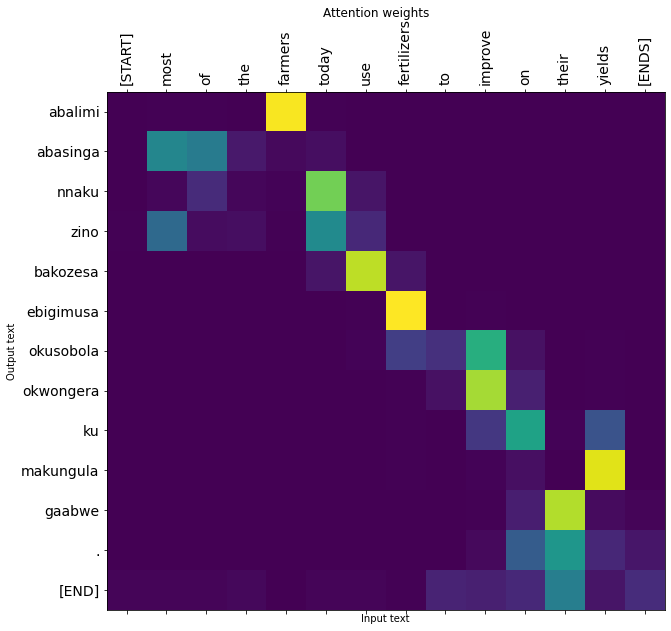

In [ ]:
i=0
plot_attention(result['attention'][i], input_text[i], result['text'][i])

In [ ]:
@tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
def tf_translate(self, input_text):
  return self.translate(input_text)

Translator.tf_translate = tf_translate

In [ ]:
def translate_symbolic(self,
                       input_text,
                       *,
                       max_length=50,
                       return_attention=True,
                       temperature=1.0):
  #shape_checker = ShapeChecker()
  #shape_checker(input_text, ('batch',))

  batch_size = tf.shape(input_text)[0]

  # Encode the input
  input_tokens = self.input_text_processor(input_text)
  #shape_checker(input_tokens, ('batch', 's'))

  enc_output, enc_state = self.encoder(input_tokens)
  #shape_checker(enc_output, ('batch', 's', 'enc_units'))
  #shape_checker(enc_state, ('batch', 'enc_units'))

  # Initialize the decoder
  dec_state = enc_state
  new_tokens = tf.fill([batch_size, 1], self.start_token)
  #shape_checker(new_tokens, ('batch', 't1'))

  # Initialize the accumulators
  result_tokens = tf.TensorArray(tf.int64, size=1, dynamic_size=True)
  attention = tf.TensorArray(tf.float32, size=1, dynamic_size=True)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  #shape_checker(done, ('batch', 't1'))

  for t in tf.range(max_length):
    dec_input = DecoderInput(
        new_tokens=new_tokens, enc_output=enc_output, mask=(input_tokens != 0))

    dec_result, dec_state = self.decoder(dec_input, state=dec_state)

    #shape_checker(dec_result.attention_weights, ('batch', 't1', 's'))
    attention = attention.write(t, dec_result.attention_weights)

    new_tokens = self.sample(dec_result.logits, temperature)
    #shape_checker(dec_result.logits, ('batch', 't1', 'vocab'))
    #shape_checker(new_tokens, ('batch', 't1'))

    # If a sequence produces an `end_token`, set it `done`
    done = done | (new_tokens == self.end_token)
    # Once a sequence is done it only produces 0-padding.
    new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

    # Collect the generated tokens
    result_tokens = result_tokens.write(t, new_tokens)

    if tf.reduce_all(done):
      break

  # Convert the list of generated token ids to a list of strings.
  result_tokens = result_tokens.stack()

  result_tokens = tf.squeeze(result_tokens, -1)
  result_tokens = tf.transpose(result_tokens, [1, 0])
  #shape_checker(result_tokens, ('batch', 't'))

  result_text = self.tokens_to_text(result_tokens)
  #shape_checker(result_text, ('batch',))

  if return_attention:
    attention_stack = attention.stack()
    #shape_checker(attention_stack, ('t', 'batch', 't1', 's'))

    attention_stack = tf.squeeze(attention_stack, 2)
    #shape_checker(attention_stack, ('t', 'batch', 's'))

    attention_stack = tf.transpose(attention_stack, [1, 0, 2])
    #shape_checker(attention_stack, ('batch', 't', 's'))

    return {'text': result_text, 'attention': attention_stack}
  else:
    return {'text': result_text}

In [ ]:
Translator.translate = translate_symbolic

In [ ]:
tf.saved_model.save(translator, 'translator_4',
                    signatures={'serving_default': translator.tf_translate})

INFO:tensorflow:Assets written to: translator_4/assets


INFO:tensorflow:Assets written to: translator_4/assets


In [ ]:
reloaded = tf.saved_model.load('translator_2')

OSError: ignored

In [ ]:
reloaded2 = tf.saved_model.load('translator_4')

In [ ]:
three_input_text = tf.constant([
    'Uganda has many young people.',
    'Commercial farmers need help.',
])

In [ ]:
result = reloaded.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

eggwanga gakola abantu bangi .
abalima ebintu beetaaga okuyambako obulungi .



In [ ]:
result = reloaded2.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

uganda efuna abavubuka bangi .
abalima ebintu by ' okutunda bawa abantu okuyambibwa .



In [ ]:
result = reloaded2.tf_translate(three_input_text)

for tr in result['text']:
  print(tr.numpy().decode())

print()

uganda erina abaana bangi .
abalima abalima ebintu eby ' ebyobugagga byetaaga obuyambi .



In [ ]:
example_output_tokens = tf.random.uniform(
    shape=[5, 2], minval=0, dtype=tf.int64,
    maxval=output_text_processor.vocabulary_size())
translator.tokens_to_text(example_output_tokens).numpy()

array([b'tebanneetuuka yadde', b'yawuniikirira gavunaanyizibwa',
       b'envuba ensonga', b'tebeefuga batwala', b'people okutwalibwa'],
      dtype=object)

In [ ]:
example_output_tokens = tf.random.uniform(
    shape=[5, 2], minval=0, dtype=tf.int64,
    maxval=output_text_processor.vocabulary_size())
translator.tokens_to_text(example_output_tokens).numpy()

array([b'bisolo kusaasaanyizibwa', b'okujjanjaba ndiima',
       b'okwegadanga siniya', b'kuyambye okusiiba',
       b'ozigeraageranya erondoola'], dtype=object)

In [ ]:
!pip install gradio

     |████████████████████████████████| 5.6 MB 5.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 2.0 MB 32.8 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 210 kB 45.0 MB/s 
     |████████████████████████████████| 1.1 MB 29.9 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 46.2 MB/s 
     |████████████████████████████████| 144 kB 44.5 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 10.9 MB 32.6 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 3.6 MB 35.1 MB/s 
     |████████████████████████████████| 856 kB 45.1 MB/s 
     |████████████████████████████████| 61 kB 395 kB/s 
     |████████████████████████

In [ ]:
import gradio as gr

In [ ]:
def changer(text):
  text = tf.constant([text])
  result = reloaded.tf_translate(input_text=text)
  output = result['text'][0].numpy().decode()
  return output



In [ ]:
iface = gr.Interface(fn=changer,inputs="textbox",outputs="textbox")

In [ ]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://33654.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7fd1a7fdd950>,
 'http://127.0.0.1:7863/',
 'https://33654.gradio.app')

In [ ]:
import os

In [ ]:
model_save_path = os.path.join(path,'translator_LSTM/2/')

In [ ]:
model_save_path = os.path.join(path,'translator_biLSTM/3/')

In [ ]:
reloaded_lstm = tf.saved_model.load(model_save_path)

In [ ]:
reloaded_bilstm = tf.saved_model.load(model_save_path)

In [ ]:
reloaded_gru = tf.saved_model.load(model_save_path)

In [ ]:
for i,v in test_ds.take(1):
  input_text = i
  output_text = v

In [ ]:
result1 = reloaded_lstm.tf_translate(input_text)

In [ ]:
result2 = reloaded_bilstm.tf_translate(input_text)

In [ ]:
result3 = reloaded_gru.tf_translate(input_text)

In [ ]:
import collections,math

In [ ]:
def bleu(pred_seq, label_seq, k):
    """Compute the BLEU."""
    pred_tokens, label_tokens = tf.strings.split(pred_seq), tf.strings.split(label_seq)
    len_pred, len_label = len(pred_tokens), len(label_tokens)
    score = math.exp(min(0, 1 - len_label / len_pred))
    for n in range(1, k + 1):
        num_matches, label_subs = 0, collections.defaultdict(int)
        for i in range(len_label - n + 1):
            label_subs[' '.join(tf.compat.as_str_any(label_tokens[i: i + n].numpy()))] += 1
        for i in range(len_pred - n + 1):
            if label_subs[' '.join(tf.compat.as_str_any(pred_tokens[i: i + n].numpy()))] > 0:
                num_matches += 1
                label_subs[' '.join(tf.compat.as_str_any(pred_tokens[i: i + n].numpy()))] -= 1
        score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))
    return score

In [ ]:
m=0
for tr in result1['text']:
  tf.print("Original English Sentence: " + input_text[m])
  tf.print("Original Luganda Sentence: " + output_text[m])
  print("Predicted Luganda Sentence: " + tr.numpy().decode())
  #print("Bleu score: {:.3f}".format(bleu(output_text[m],input_text[m],k=2)))
  print("-------------------------------------")
  m +=1

Original English Sentence: What is the benefit of antenatal care to both mother and the baby?
Original Luganda Sentence: Mugaso ki oguli mu kukyalira eddwaliro eri omukyala ali olubuto n'omwana ali mu lubuto?
Predicted Luganda Sentence: waliwo okusaanyawo kw ' omuwendo gw ' abalwadde b ' emyaka guli waggulu era ?
-------------------------------------
Original English Sentence: Farmers are misusing funds given to them by the government to help them improve on their farming ways.
Original Luganda Sentence: Abalimi n'abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n'obulunzi bwabwe,
Predicted Luganda Sentence: abalimi n ' abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n ' obulunzi bwabwe mu kitundu kyabwe .
-------------------------------------
Original English Sentence: Health services need to be upgraded for better service delivery.
Original Luganda Sentence: Ebyobulamu byetaaga okuteekebwa ku mutindo olw

In [ ]:
m=0
for tr in result2['text']:
  tf.print("Original English Sentence: " + input_text[m])
  tf.print("Original Luganda Sentence: " + output_text[m])
  print("Predicted Luganda Sentence: " + tr.numpy().decode())
  print("-------------------------------------")
  m +=1

Original English Sentence: What is the benefit of antenatal care to both mother and the baby?
Original Luganda Sentence: Mugaso ki oguli mu kukyalira eddwaliro eri omukyala ali olubuto n'omwana ali mu lubuto?
Predicted Luganda Sentence: mugaso ki oguli mu kukyalira eddwaliro eri omukyala ali olubuto ne maama ?
-------------------------------------
Original English Sentence: Farmers are misusing funds given to them by the government to help them improve on their farming ways.
Original Luganda Sentence: Abalimi n'abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n'obulunzi bwabwe,
Predicted Luganda Sentence: abalimi n ' abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n ' obulunzi bwabwe obutono
-------------------------------------
Original English Sentence: Health services need to be upgraded for better service delivery.
Original Luganda Sentence: Ebyobulamu byetaaga okuteekebwa ku mutindo olw'empeereza ennu

In [ ]:
m=0
for tr in result3['text']:
  tf.print("Original English Sentence: " + input_text[m])
  tf.print("Original Luganda Sentence: " + output_text[m])
  print("Predicted Luganda Sentence: " + tr.numpy().decode())
  print("-------------------------------------")
  m +=1

Original English Sentence: What is the benefit of antenatal care to both mother and the baby?
Original Luganda Sentence: Mugaso ki oguli mu kukyalira eddwaliro eri omukyala ali olubuto n'omwana ali mu lubuto?
Predicted Luganda Sentence: mugaso ki oguli mu kukyalira eddwaliro eri omukyala ali olubuto n ' omwana ali mu lubuto ?
-------------------------------------
Original English Sentence: Farmers are misusing funds given to them by the government to help them improve on their farming ways.
Original Luganda Sentence: Abalimi n'abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n'obulunzi bwabwe,
Predicted Luganda Sentence: abalimi n ' abalunzi beeyambisa bubi ssente ezibaweebwa gavumenti mu kubayamba okutumbula ebyobulimi n ' obulunzi bwabwe ,
-------------------------------------
Original English Sentence: Health services need to be upgraded for better service delivery.
Original Luganda Sentence: Ebyobulamu byetaaga okuteekebwa ku mutindo olw'empe